## XGBoost Grid Search

Based on the simple model comparison from the previous notebook (04), XGBoost appears to be the most promising model. Therefore, this notebook attempts to improve on the performance of XGBoost by conducting a grid search for the best hyperparameters.

**-- Results --**

After extensive experimentation with the best combination of available features and tuning of the hyperparameter ranges within the grid search, the final model produces encouraging results:

Mean Squared Error: 0.8608870967741935

R² Score: 0.9449789012874332

**-- Recommendations for Future Research --**

1. With more data, the approach in this notebook should yield even better results, particularly for predicting larger waves.
2. Experimenting with different lag features could better capture the time-series aspects of the data.
3. Experimenting with neural network models could better model the non-linear relationships between features and the target.
4. If procuring more data is impossible, then it might be worth developing a two phase ensemble approach:
    a. First, develop a classifier to separate out outlier data.
    b. Second, develop two models, one to predict on the bulk of the data and one to predict on the outliers.
5. Another single model appraoch would be to write a custom scoring function for the xgboost grid search, which penalises incorrect predictions on outlier data more severely.

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=RuntimeWarning)

# Data Import

In [3]:
# Load the preprocessed data
df = pd.read_csv('~/Projects/surfline/data/preprocessed.dat', index_col=0, parse_dates=True)
print(f"Data shape: {df.shape}")
# df.head()

Data shape: (2480, 30)


In [4]:
df.columns

Index(['WVHT_max', 'DPD_at_peak', 'DPD_mean', 'APD_mean', 'MWD_at_peak',
       'MWD_mean', 'wave_power', 'WVHT_max_2d_avg', 'MWD_2d_avg', 'APD_2d_avg',
       'DPD_mean_2d_avg', 'wave_power_2d_avg', 'WVHT_max_3d_avg', 'MWD_3d_avg',
       'APD_3d_avg', 'DPD_mean_3d_avg', 'wave_power_3d_avg',
       'WVHT_max_MWD_interact', 'WVHT_max_DPD_mean_interact',
       'WVHT_max_2d_avg_log', 'APD_2d_avg_log', 'wave_power_2d_avg_log',
       'WVHT_max_3d_avg_log', 'MWD_wave_power_interact_log', 'nshor',
       'DPD_mean_wave_power_interact^2', 'WVHT_max_APD_interact^2',
       'WVHT_max_APD_interact_log^2', 'day_cos', 'is_winter'],
      dtype='object')

In [5]:
# class_counts = df['nshor'].value_counts()
# print(class_counts)

# Preprocessing

In [6]:
# List of columns to use as features -- all 29 available features
feature_columns = ['WVHT_max', 'DPD_at_peak', 'DPD_mean', 'APD_mean', 'MWD_at_peak',
       'MWD_mean', 'wave_power', 'WVHT_max_2d_avg', 'MWD_2d_avg', 'APD_2d_avg',
       'DPD_mean_2d_avg', 'wave_power_2d_avg', 'WVHT_max_3d_avg', 'MWD_3d_avg',
       'APD_3d_avg', 'DPD_mean_3d_avg', 'wave_power_3d_avg',
       'WVHT_max_MWD_interact', 'WVHT_max_DPD_mean_interact',
       'WVHT_max_2d_avg_log', 'APD_2d_avg_log', 'wave_power_2d_avg_log',
       'WVHT_max_3d_avg_log', 'MWD_wave_power_interact_log',
       'DPD_mean_wave_power_interact^2', 'WVHT_max_APD_interact^2',
       'WVHT_max_APD_interact_log^2', 'day_cos', 'is_winter']

# Specify target variable
target_column = 'nshor'

# Create X (features) and y (target)
X = df[feature_columns]
y = df[target_column]

In [7]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # using the same scale fitted on the training data to avoid data leakage

# Hyperparameter Tuning

In [9]:
# Define parameter grid -- multiple other grid combinations were tested during experimentation
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.005, 0.0075, 0.01],
    'n_estimators': [400, 500, 600],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8]
}

In [10]:
# Initialize the regressor
xg_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

In [11]:
# # Set up the grid search
# grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3,  n_jobs=-1, verbose=1)
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

In [12]:
# # Fit the grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.005, 0.0075, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [400, 500, 600],
                         'subsample': [0.7, 0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [13]:
# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Best parameters: {best_params}")
# Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 600, 'subsample': 0.7}

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 600, 'subsample': 0.7}


# Evaluate Model

In [14]:
# Make predictions with best model
y_pred = best_model.predict(X_test_scaled)
y_pred_rounded = np.round(y_pred)

In [15]:
# Since wave heights are whole numbers, round predictions to nearest integer
y_pred_rounded = [round(pred) for pred in y_pred]

In [16]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_rounded)
r2 = r2_score(y_test, y_pred_rounded)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squred Error: {np.sqrt(mse)}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.8608870967741935
Root Mean Squred Error: 0.9278400167993367
R² Score: 0.9449789012874332


## Visualise Results

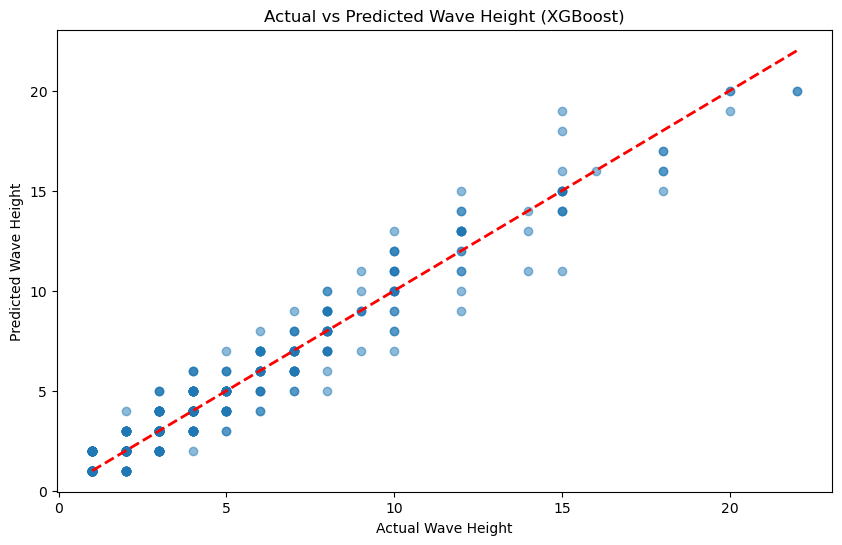

In [17]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rounded, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Wave Height")
plt.ylabel("Predicted Wave Height")
plt.title("Actual vs Predicted Wave Height (XGBoost)")
plt.show()

In [18]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': feature_columns, 'Importance': best_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

                           Feature  Importance
26     WVHT_max_APD_interact_log^2    0.310829
18      WVHT_max_DPD_mean_interact    0.233058
25         WVHT_max_APD_interact^2    0.205473
24  DPD_mean_wave_power_interact^2    0.079763
23     MWD_wave_power_interact_log    0.033511
3                         APD_mean    0.029722
20                  APD_2d_avg_log    0.014818
9                       APD_2d_avg    0.011250
10                 DPD_mean_2d_avg    0.009812
17           WVHT_max_MWD_interact    0.009269
6                       wave_power    0.007563
5                         MWD_mean    0.005430
0                         WVHT_max    0.005128
2                         DPD_mean    0.004842
15                 DPD_mean_3d_avg    0.004640
14                      APD_3d_avg    0.003859
4                      MWD_at_peak    0.003352
11               wave_power_2d_avg    0.003111
13                      MWD_3d_avg    0.003041
12                 WVHT_max_3d_avg    0.002884
16           

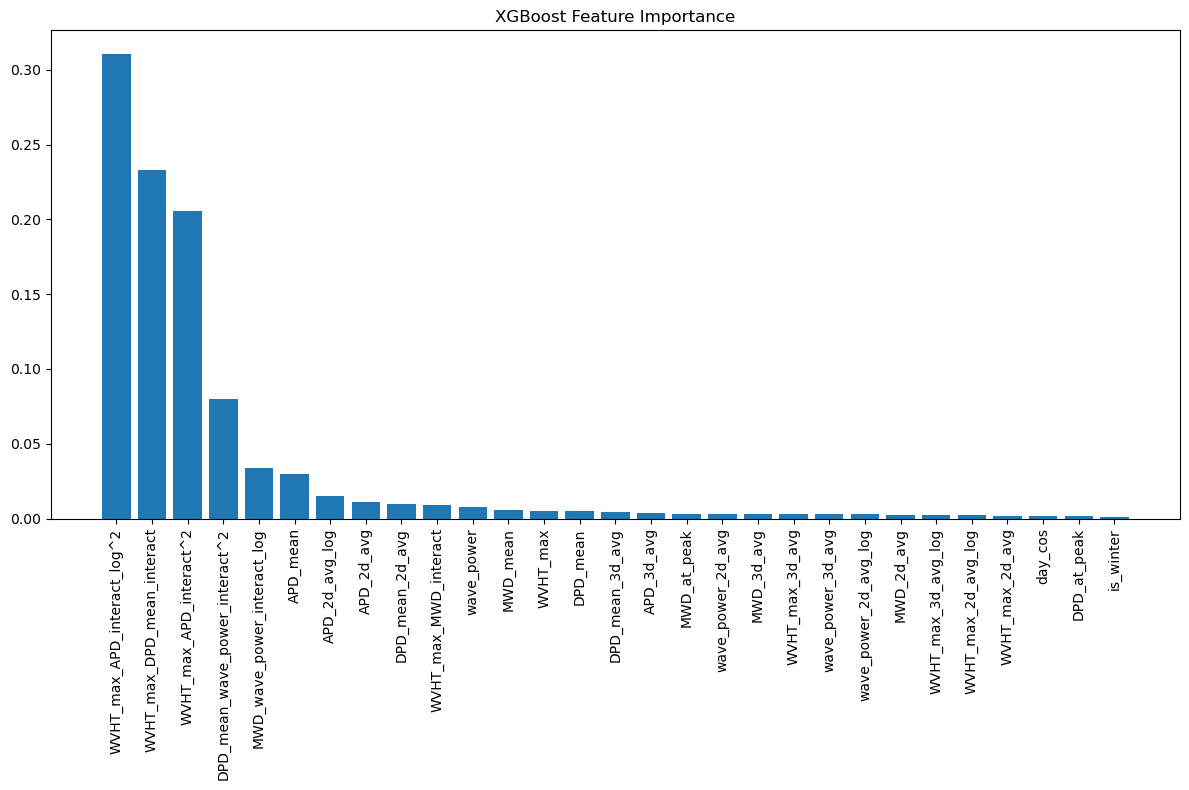

In [19]:
# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=90)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()